# Luca Miglior - Assignment 2 - Track 3


## First part, import dataset and preparing it by binarizing data.

In [1]:
from rbm import RestrictedBoltzmannMachine as RBM
import matplotlib.pyplot as plt

# todo: use provided dataset instead of the sklearn one.
from sklearn.datasets import load_digits

dataset = load_digits()
dataset.data[dataset.data > 0] = 1

# split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=42)

## Now, we have to train one RBM for each digit present in the MNIST dataset.

In [2]:
from sklearn.metrics import accuracy_score
def evaluate_rbm(rbm, X_test, threshold=0.5):
    accuracy = []
    for i in range(len(X_test)):
        test_sample = X_test[i]
        test_sample[test_sample > threshold] = 1
        reconstructed = rbm.reconstruct(test_sample)
        reconstructed[reconstructed > threshold] = 1
        reconstructed[reconstructed < threshold] = 0
        accuracy.append(accuracy_score(test_sample, reconstructed))
    return np.mean(accuracy)

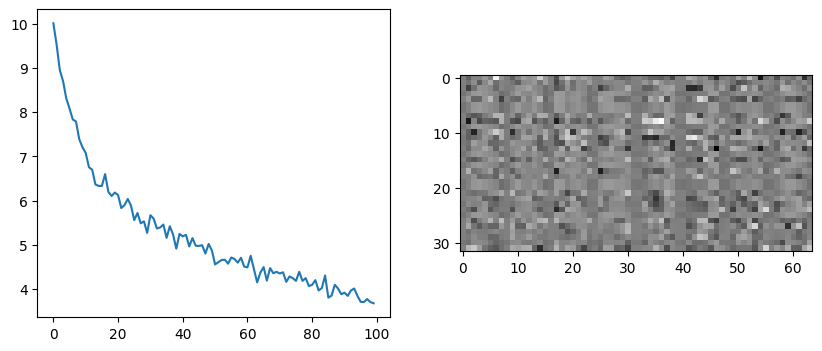

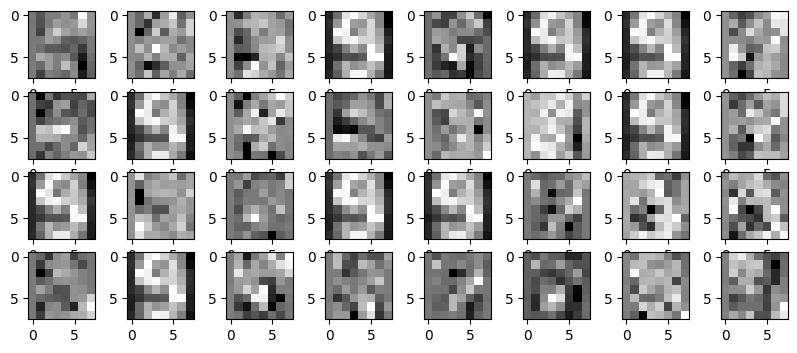

In [3]:
rbm = RBM(64, 32)
rbm.train(dataset.data[dataset.target == 9], 100, 0.1)

# plot errors and weights beside
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].plot(rbm.errors)
axes[1].imshow(rbm.weights, cmap='gray')

# for each row in weights, plot the image
fig, axes = plt.subplots(4, 8, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(rbm.weights[i].reshape(8, 8), cmap='gray')
    